In [1]:
import matplotlib.pyplot as plt
import matplotlib
import scipy
import numpy as np

In [2]:
matplotlib.rcParams.update({'font.size': 22})

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
def read(spe_filename):
    """given a .Spe file, return the data as a numpy array"""
    N_CHANNELS = 8191
    START_LINE = 13
    
    with open(spe_filename, "r", encoding="utf-8") as spe_file:
        spe_lines = spe_file.readlines()
    data_lines = spe_lines[START_LINE:START_LINE+N_CHANNELS]
    data_nums = [int(d.strip().replace("\n", "")) for d in data_lines]
    return np.array(data_nums)

In [5]:
spectrum_co60 = read('run2_co60.Spe')
spectrum_ba133 = read('run4_ba133.Spe')
spectrum_na22 = read('run5_na22.Spe')
spectrum_x = read('run6_mistery_source.Spe')
spectrum_bkg = read('run3_background.Spe')

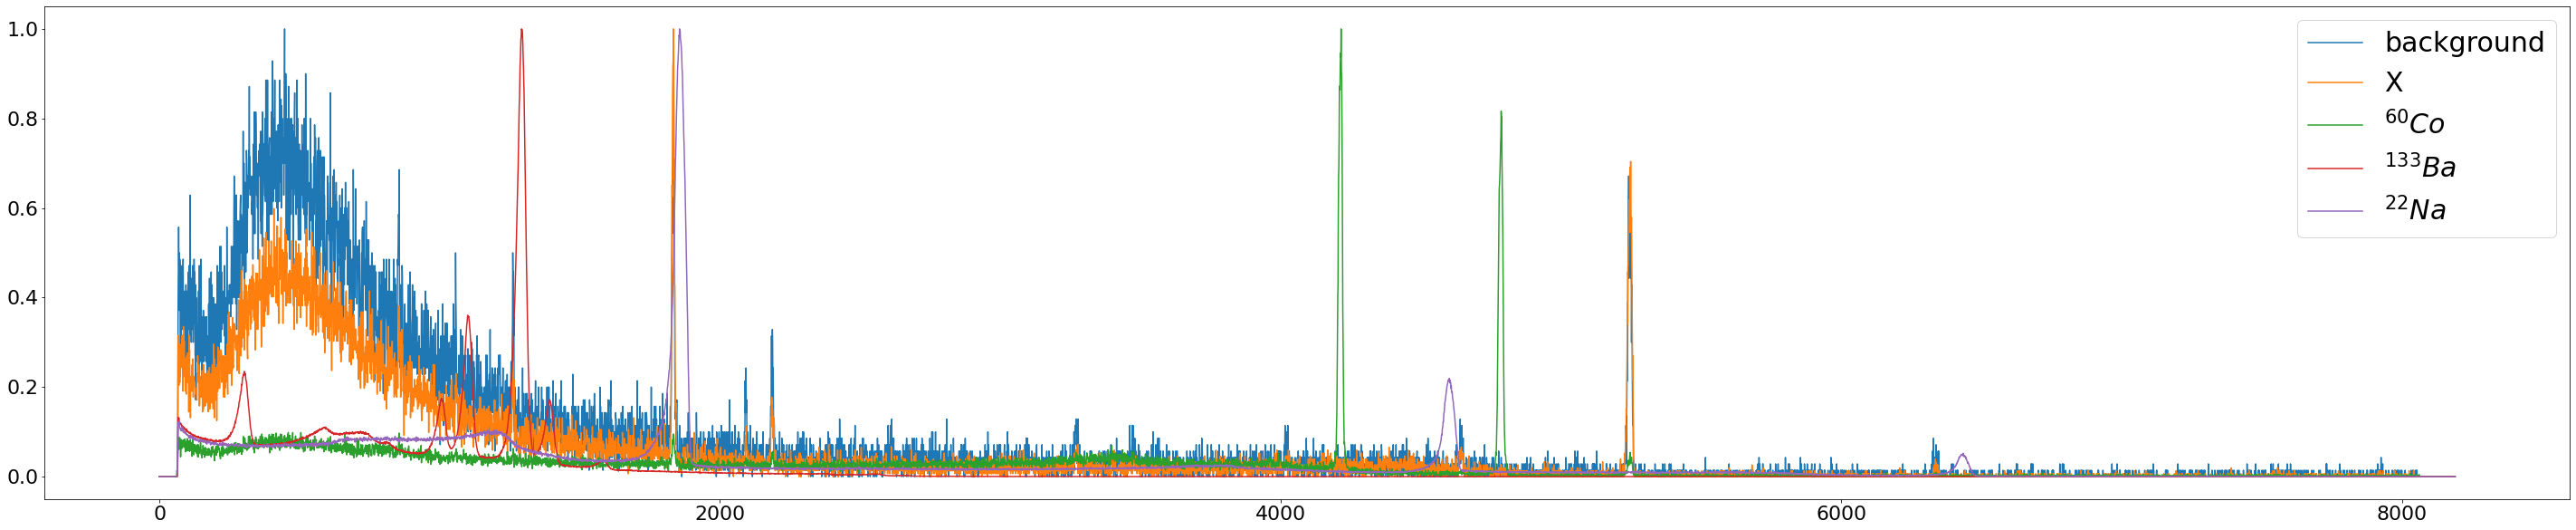

In [6]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
plt.plot(spectrum_x/max(spectrum_x), label=r'X')
plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

(0.0, 1000.0)

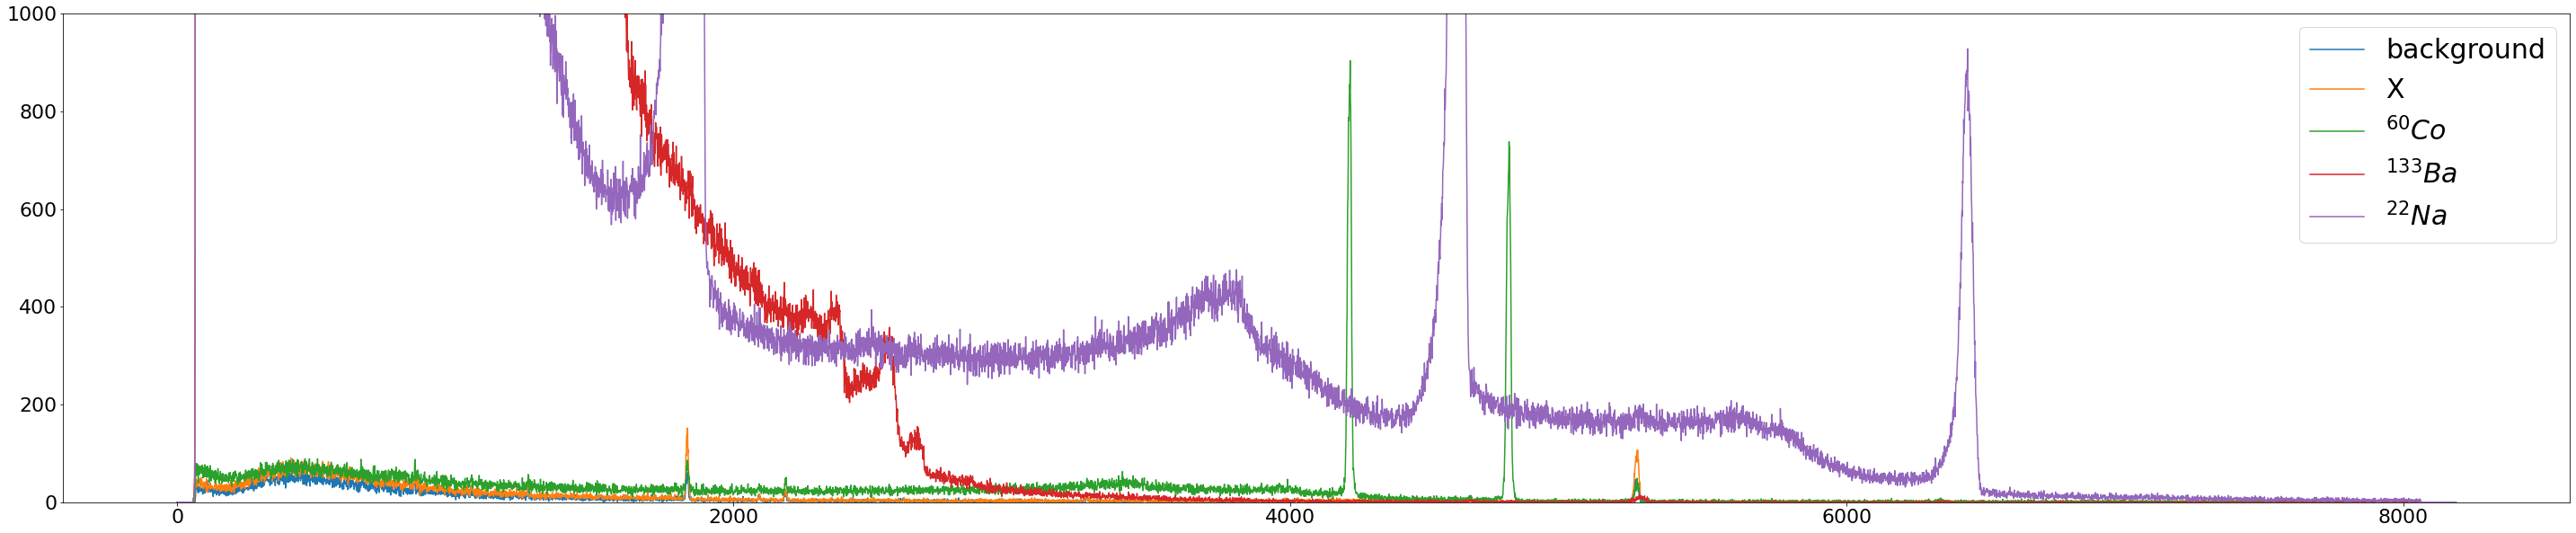

In [7]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.legend(fontsize=30)
plt.ylim(0, 1000)

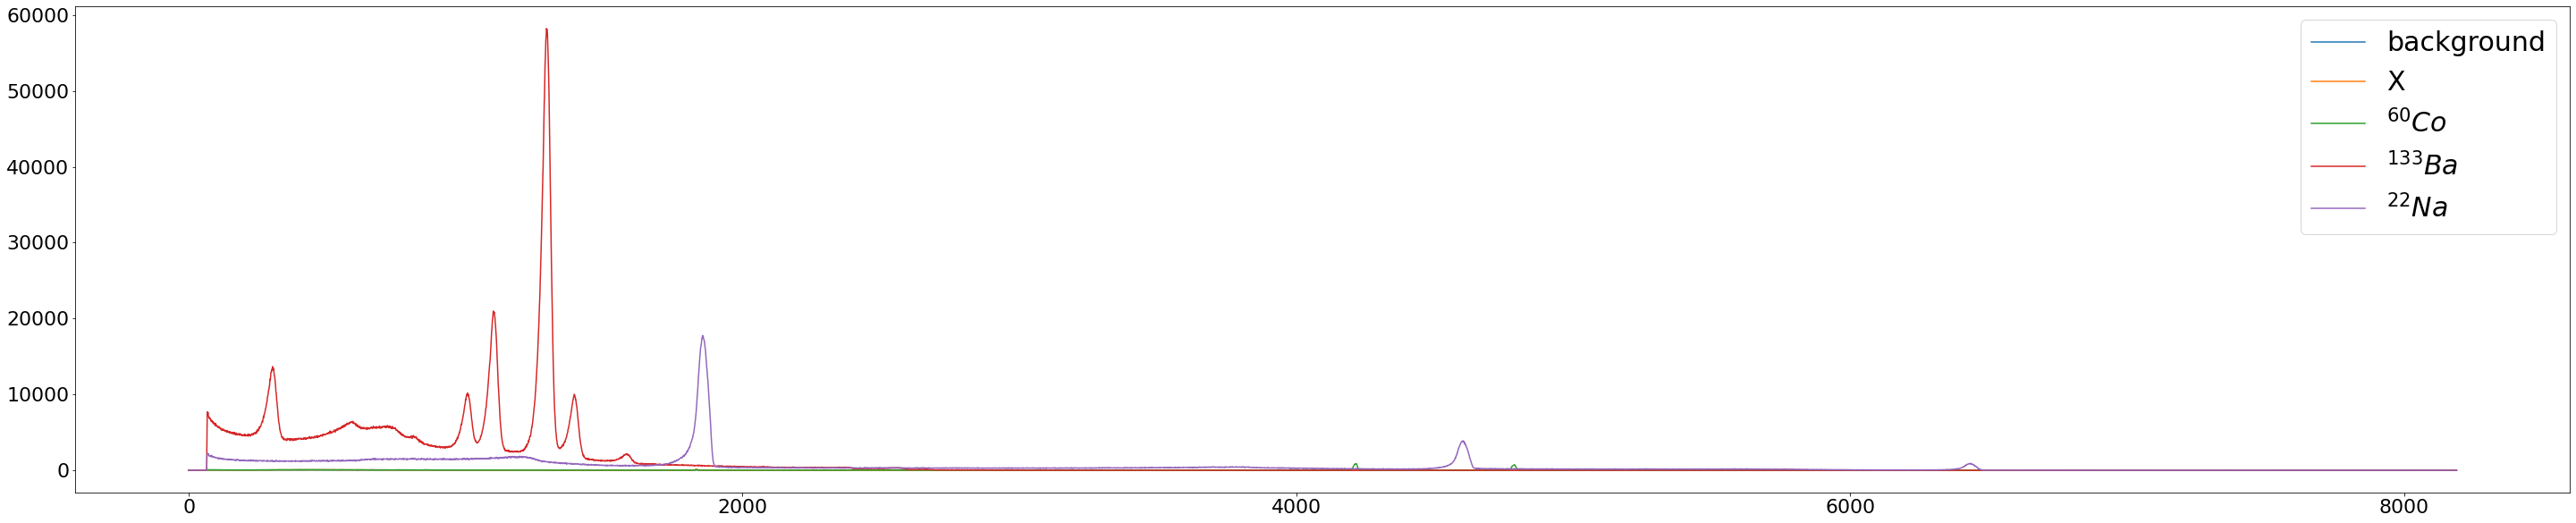

In [8]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.legend(fontsize=30)
# plt.ylim(0, 1000)


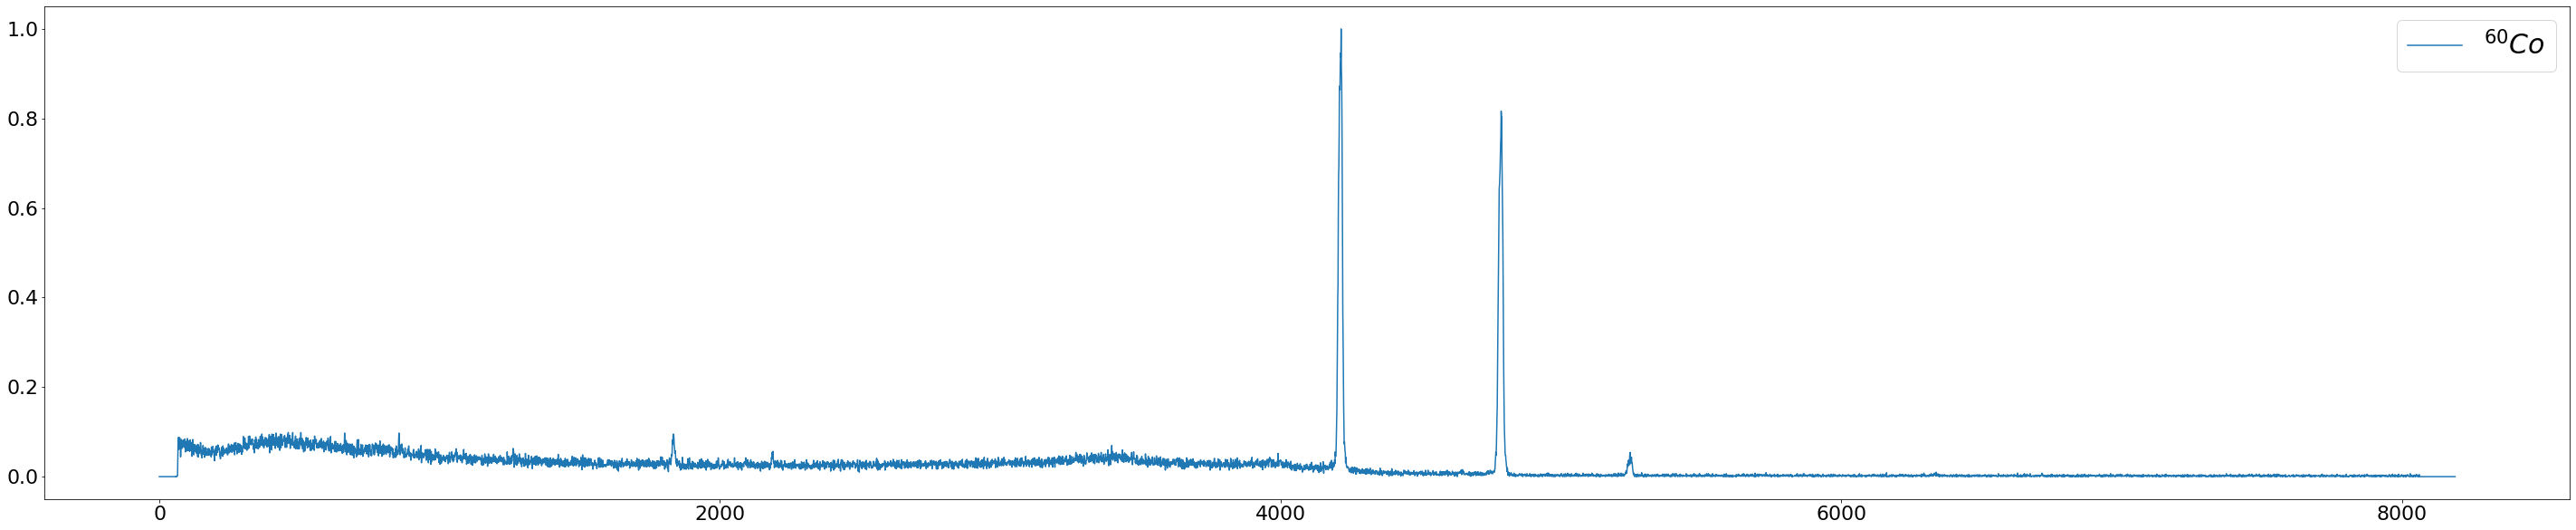

In [9]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
# plt.plot(spectrum_x/max(spectrum_x), label=r'X')
plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

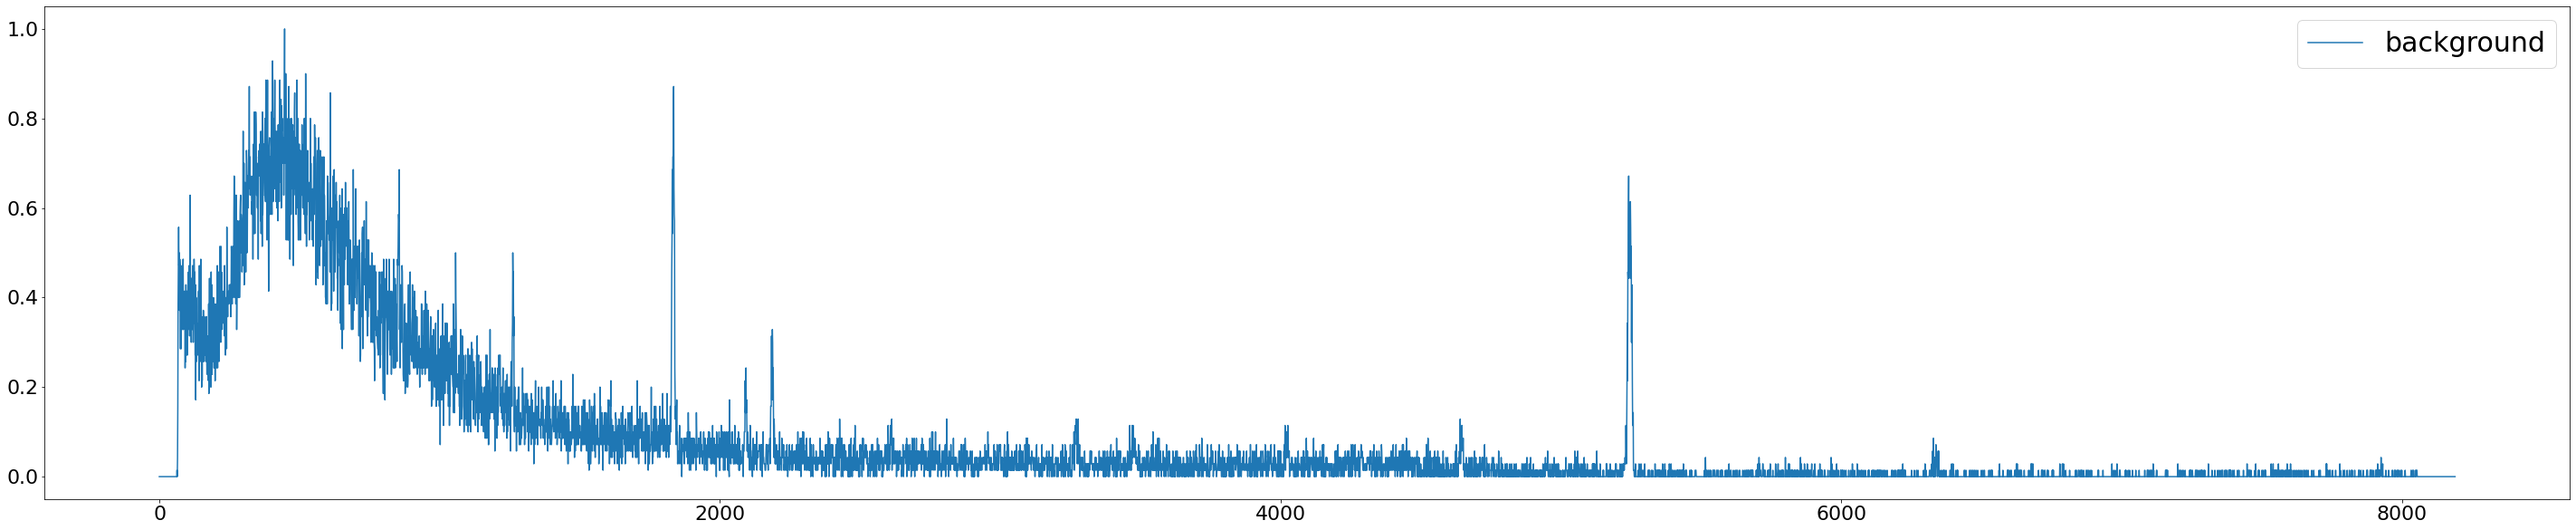

In [10]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg/max(spectrum_bkg), label=r'background')
# plt.plot(spectrum_x/max(spectrum_x), label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

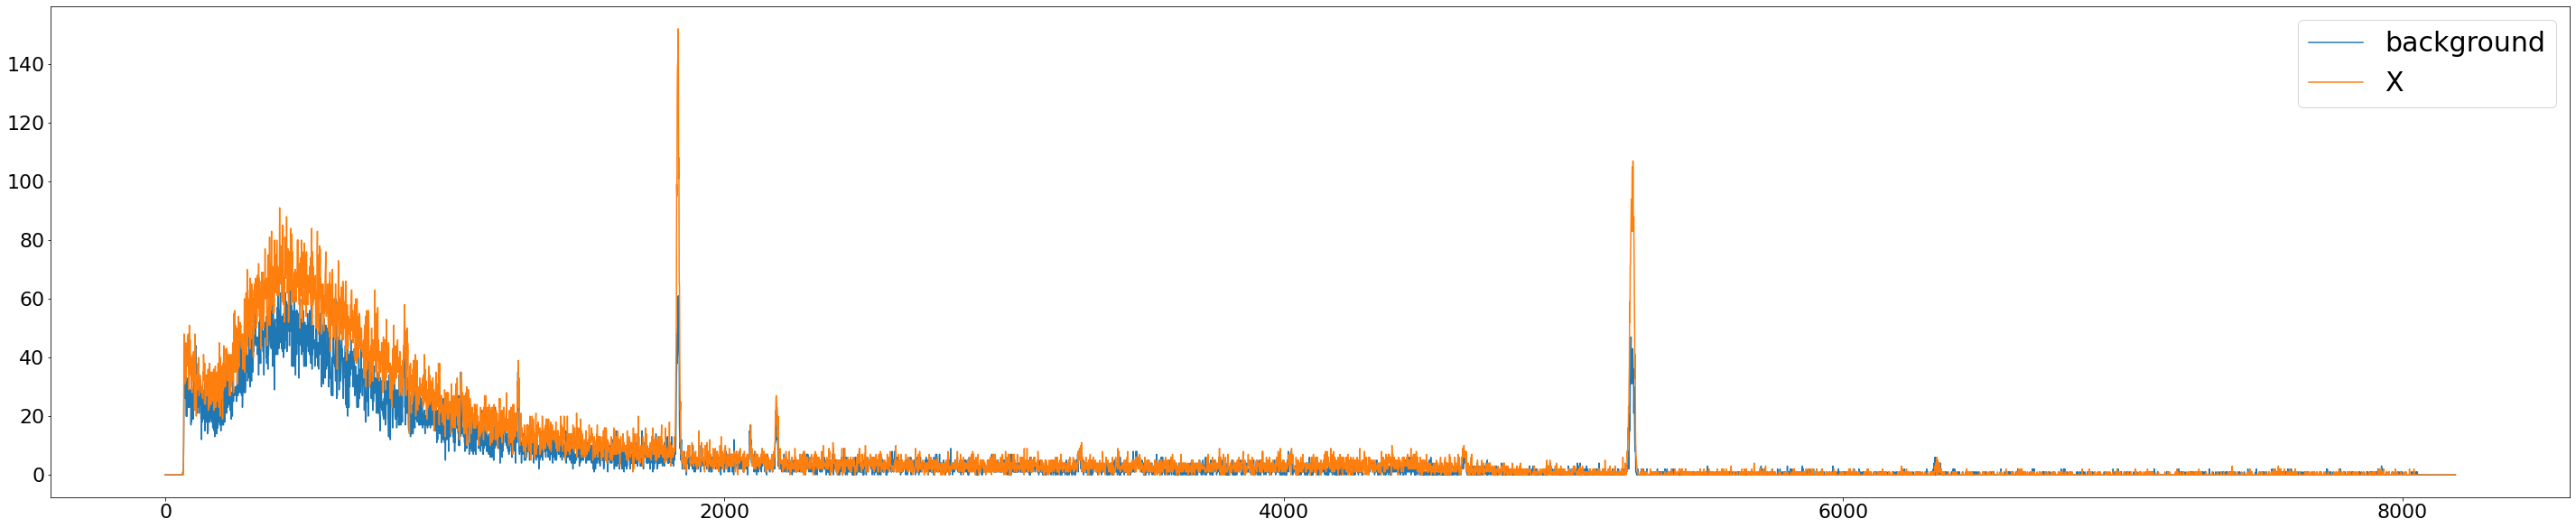

In [11]:
plt.figure(figsize=(50, 10))


plt.plot(spectrum_bkg, label=r'background')
plt.plot(spectrum_x, label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')

plt.legend(fontsize=30)

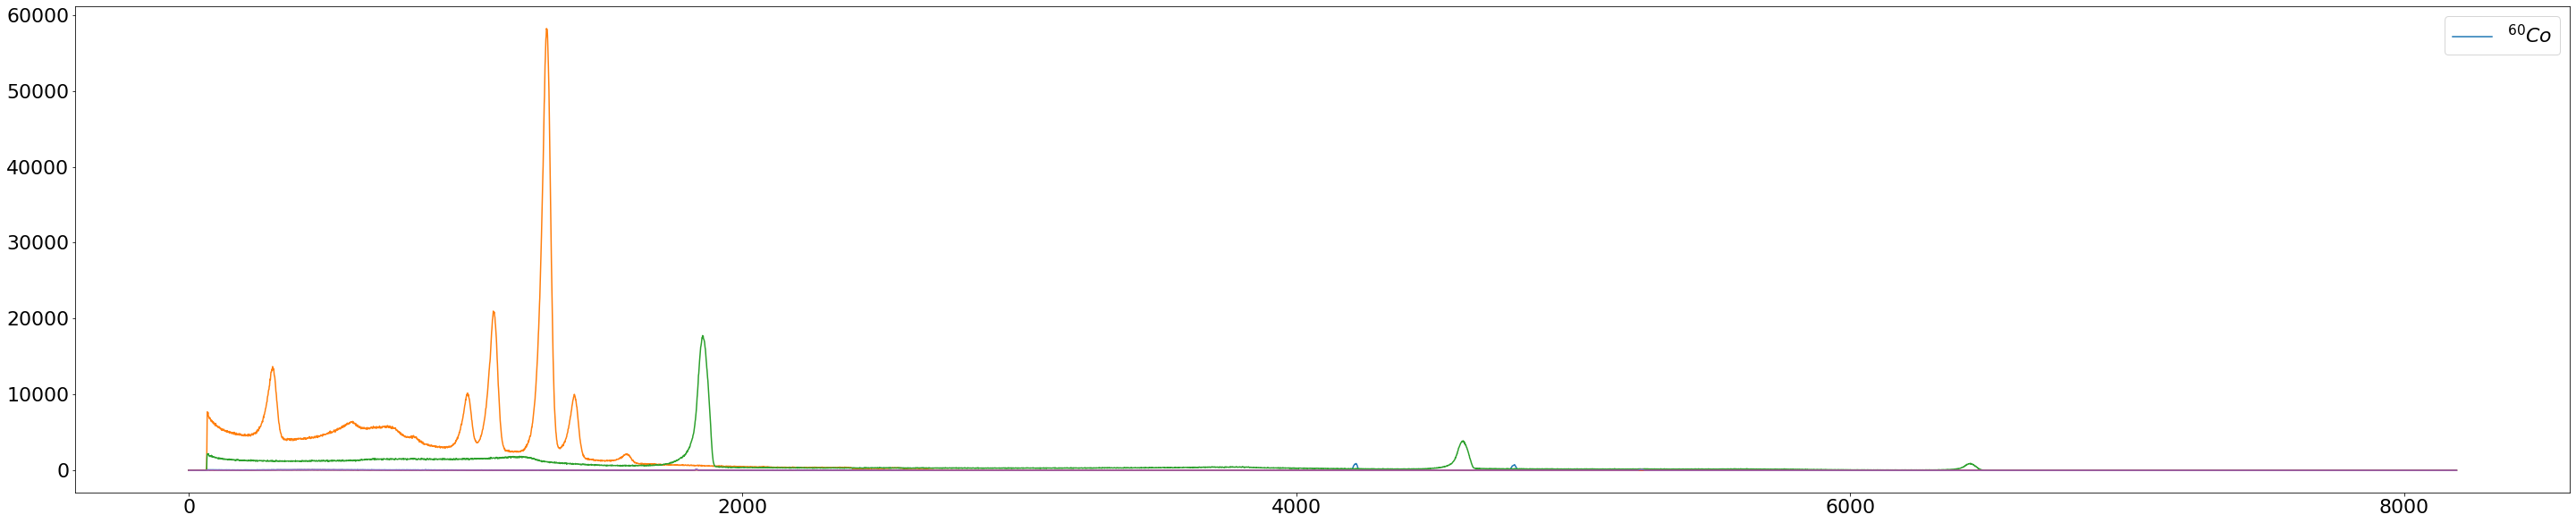

In [12]:
plt.figure(figsize=(50, 10))

plt.plot(spectrum_co60, label=r'$^{60}Co$')
plt.plot(spectrum_ba133)
plt.plot(spectrum_na22)
plt.plot(spectrum_bkg)
plt.plot(spectrum_x)

plt.legend()

(4000.0, 5000.0)

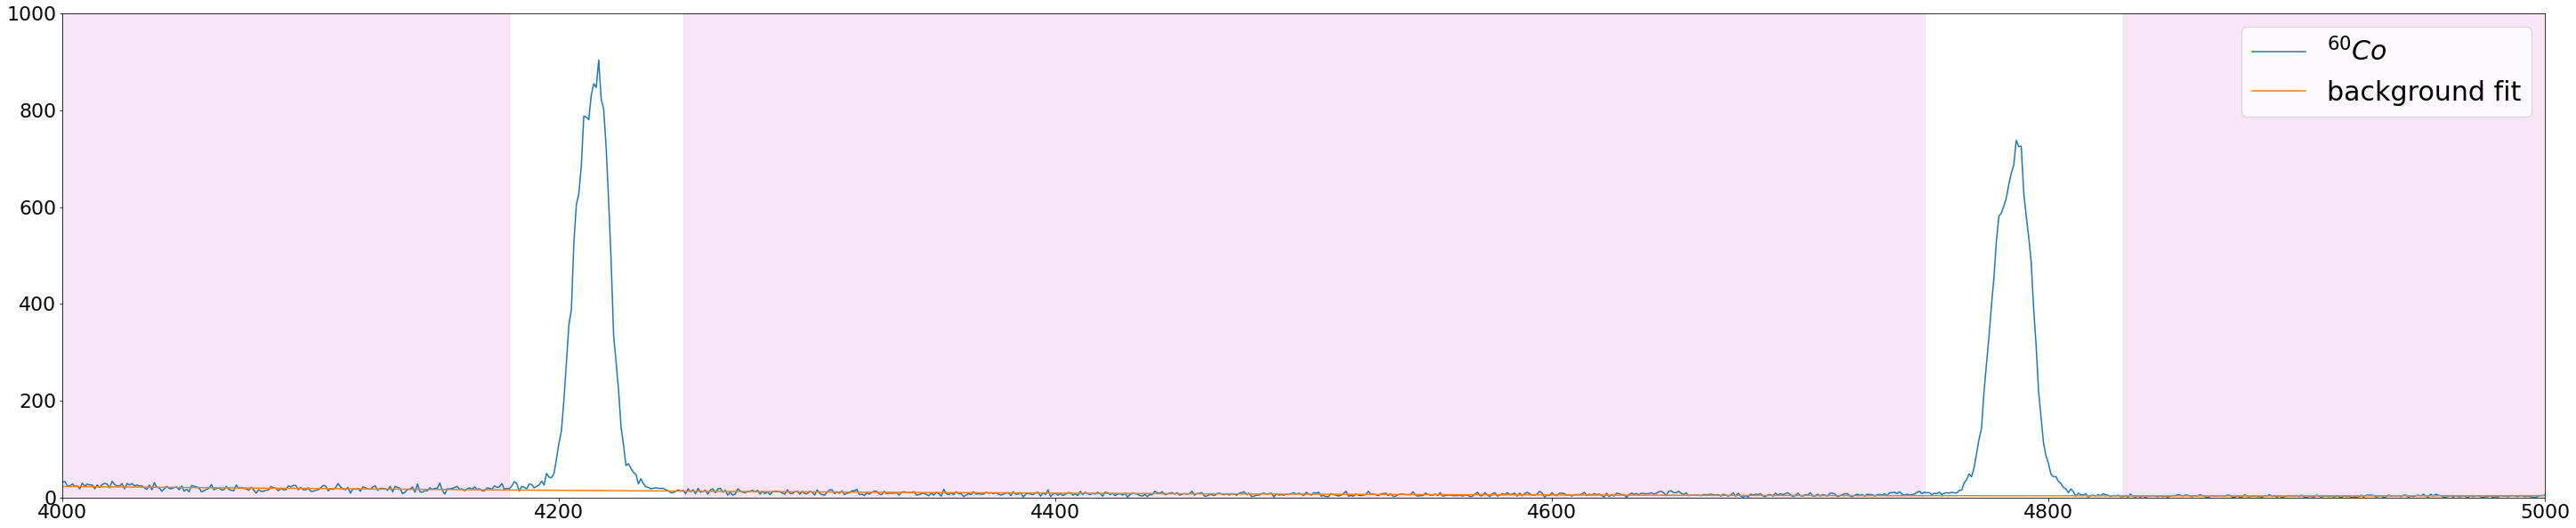

In [178]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60, label=r'$^{60}Co$')
# plt.plot(spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.axvspan(4000, 4180, alpha=0.1, color='m')
plt.axvspan(4250, 4750, alpha=0.1, color='m')
plt.axvspan(4830, 5000, alpha=0.1, color='m')

xval = np.arange(len(spectrum_co60))

mask_bkg1 = ((xval>4000)*(xval<4180))^((xval>4250)*(xval<4750))^((xval>4830)*(xval<5000))
coeff = np.polyfit(xval[mask_bkg1], spectrum_co60[mask_bkg1], 2)
bkgfit = np.polyval(coeff, xval)

plt.plot(xval, bkgfit, label='background fit')

plt.legend(fontsize=30)
plt.ylim(0, 1000)
plt.xlim(4000, 5000)

In [65]:
from scipy.optimize import curve_fit

In [15]:
def gauss(x, *p):
    A, t0, v = p
    return A*np.exp(-(x-t0)**2/(2.*v))

def comb_gauss(x, *p):
    distr = 0
    for j in range(2):
        distr += gauss(x, *[p[j*3],p[j*3+1],p[j*3+2]])
    return distr

coeff_gauss, _ = curve_fit(comb_gauss, xval, spectrum_co60-bkgfit, p0=[900, 4250, 50, 800, 4800, 50])
fit_hist = comb_gauss(xval, *coeff_gauss)


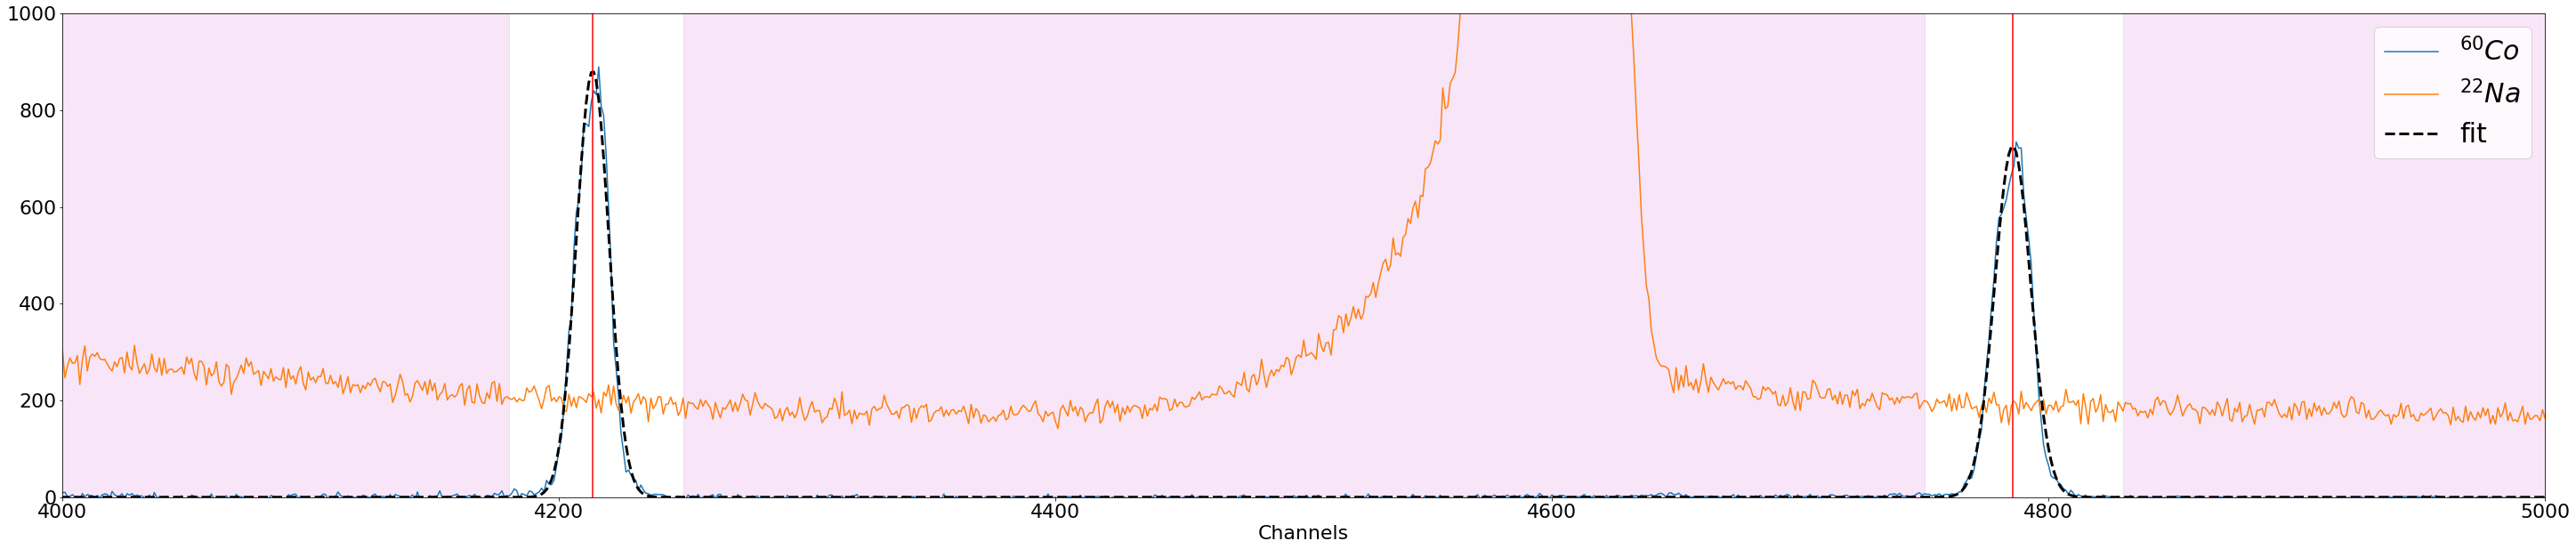

In [195]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(spectrum_co60-bkgfit, label=r'$^{60}Co$')
# plt.plot(spectrum_ba133-bkgfit, label=r'$^{133}Ba$')
plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.axvspan(4000, 4180, alpha=0.1, color='m')
plt.axvspan(4250, 4750, alpha=0.1, color='m')
plt.axvspan(4830, 5000, alpha=0.1, color='m')

plt.plot(xval, fit_hist, c='k', lw=3, ls='--', label="fit")

plt.axvline(coeff_gauss[1], c='r')
plt.axvline(coeff_gauss[4], c='r')

plt.legend(fontsize=30)
plt.ylim(0, 1000)
plt.xlim(4000, 5000)
plt.xlabel("Channels")
plt.show()

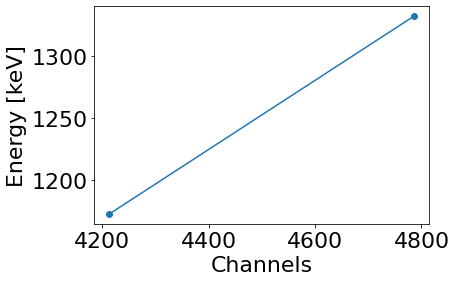

In [186]:
#what peaks do we need to match?
Co60_Peaks = [1173, 1332]
# Ba133_Peaks = [356]
# Na22_Peaks = [511, 1274]

plt.plot([coeff_gauss[1],coeff_gauss[4]], Co60_Peaks, '-o')
plt.ylabel("Energy [keV]")
plt.xlabel("Channels")
plt.show()

In [18]:
coeff_gauss

array([ 881.31118067, 4213.55524541,   42.94739565,  726.20816551,
       4785.59391675,   52.5821917 ])

In [33]:
cal1 = np.polyfit([coeff_gauss[1],coeff_gauss[4]], [1173, 1332], 1)

#convert our channel values to energy values for the x axis based off the results of the 
channelToEnergy = np.polyval(cal1, xval)

In [36]:
# cal1

In [37]:
# 0.277*4200+1.8287

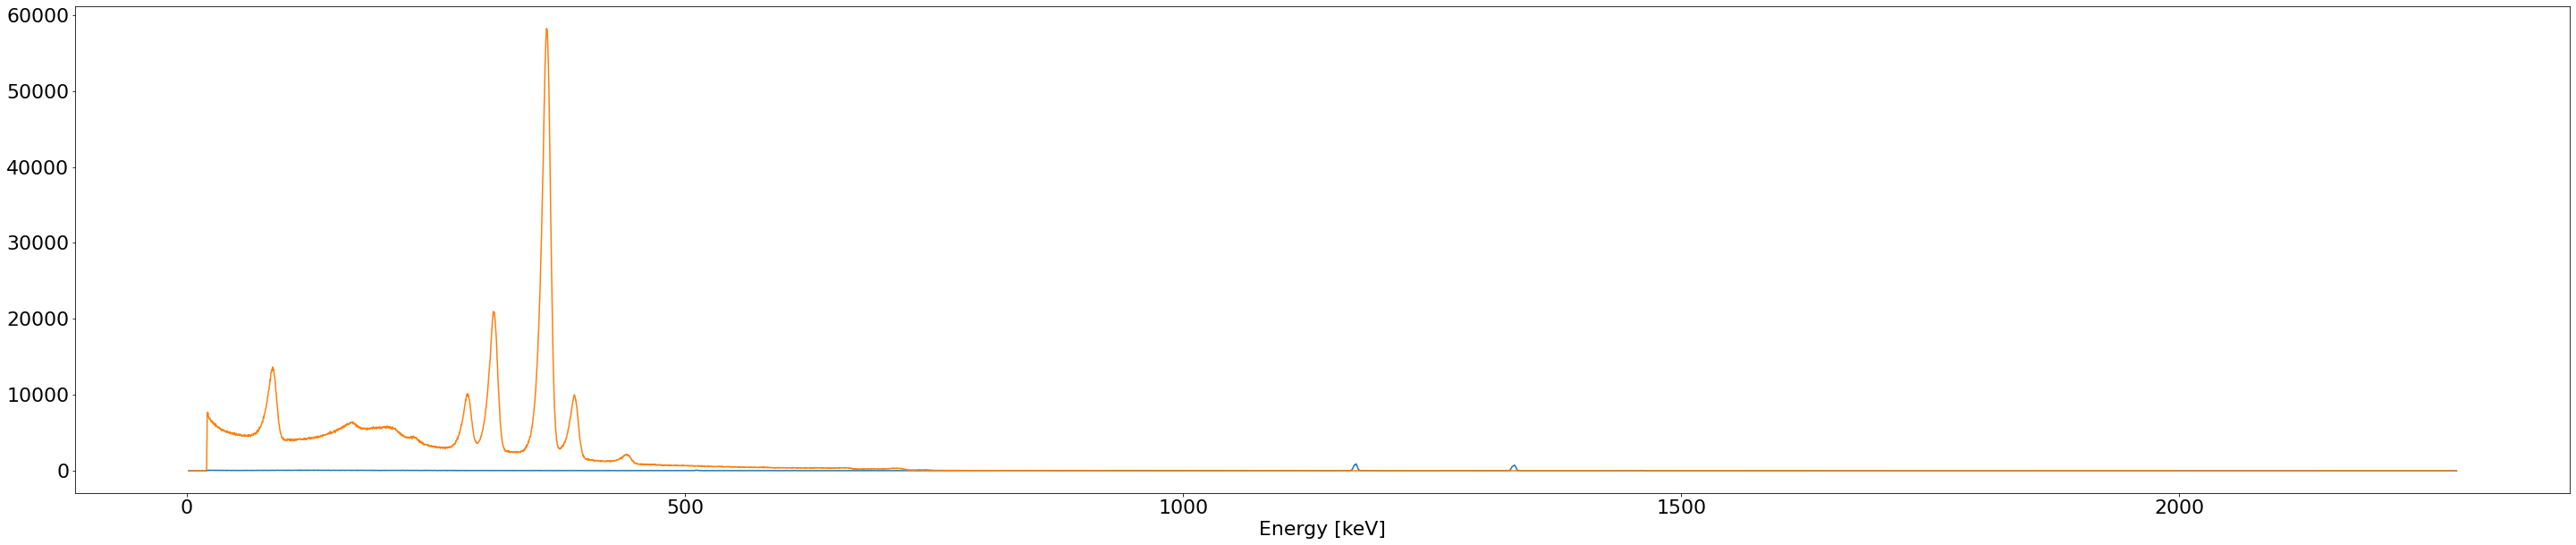

In [189]:
plt.figure(figsize=(50, 10))

# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(channelToEnergy, spectrum_co60, label=r'$^{60}Co$')
plt.plot(channelToEnergy, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')
plt.xlabel("Energy [keV]")
plt.show()

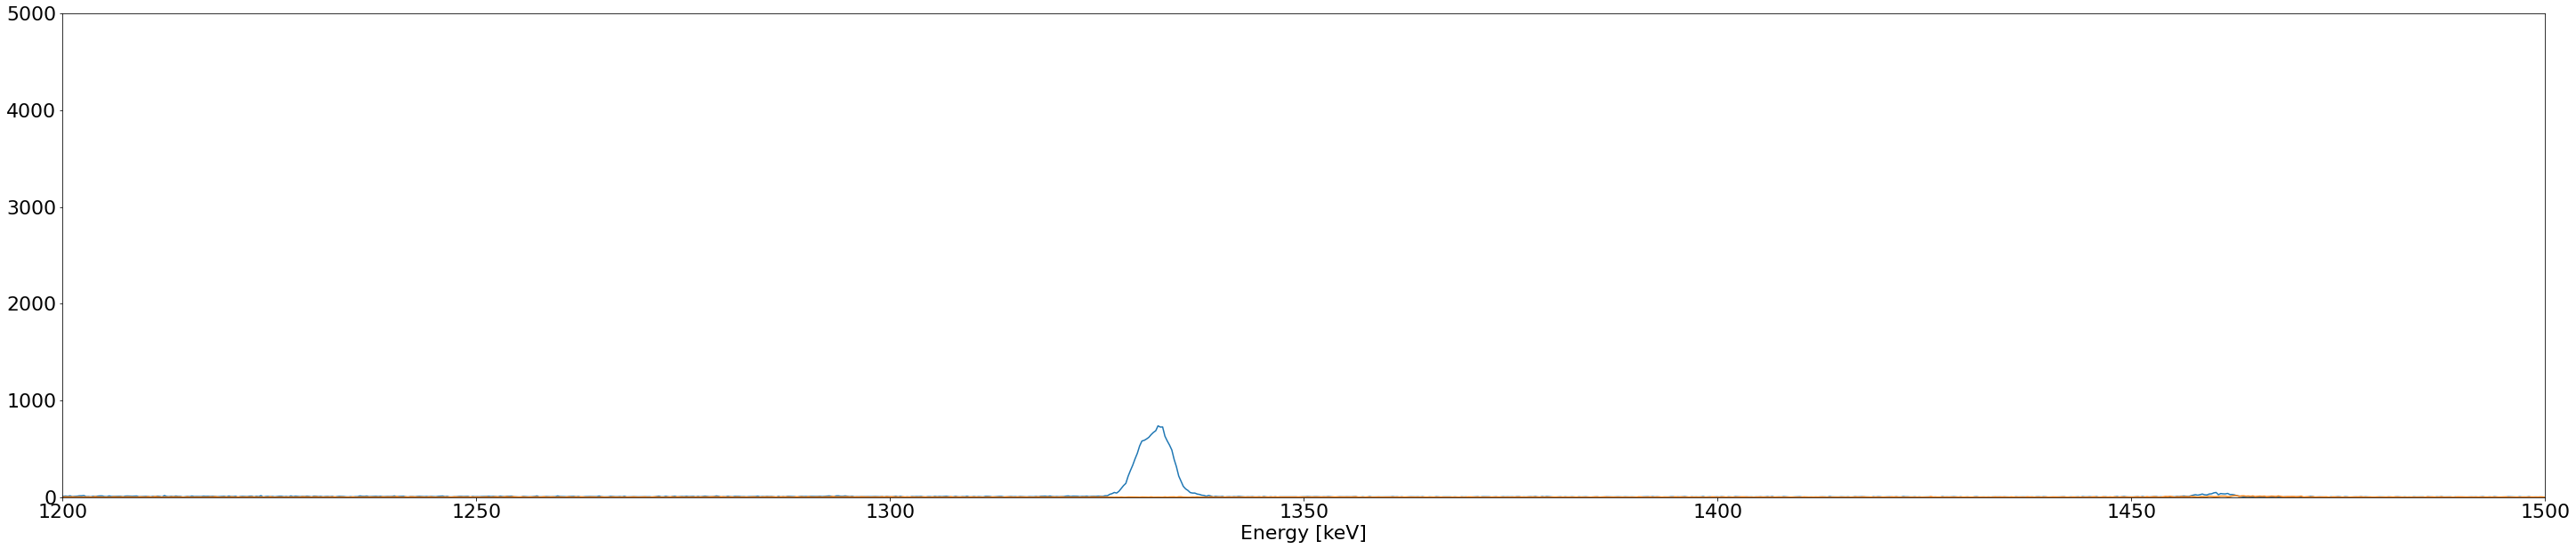

In [188]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(channelToEnergy, spectrum_co60, label=r'$^{60}Co$')
plt.plot(channelToEnergy, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')
plt.xlabel("Energy [keV]")
plt.ylim(0, 5000)
plt.xlim(1200, 1500)
plt.show()

(0.0, 500.0)

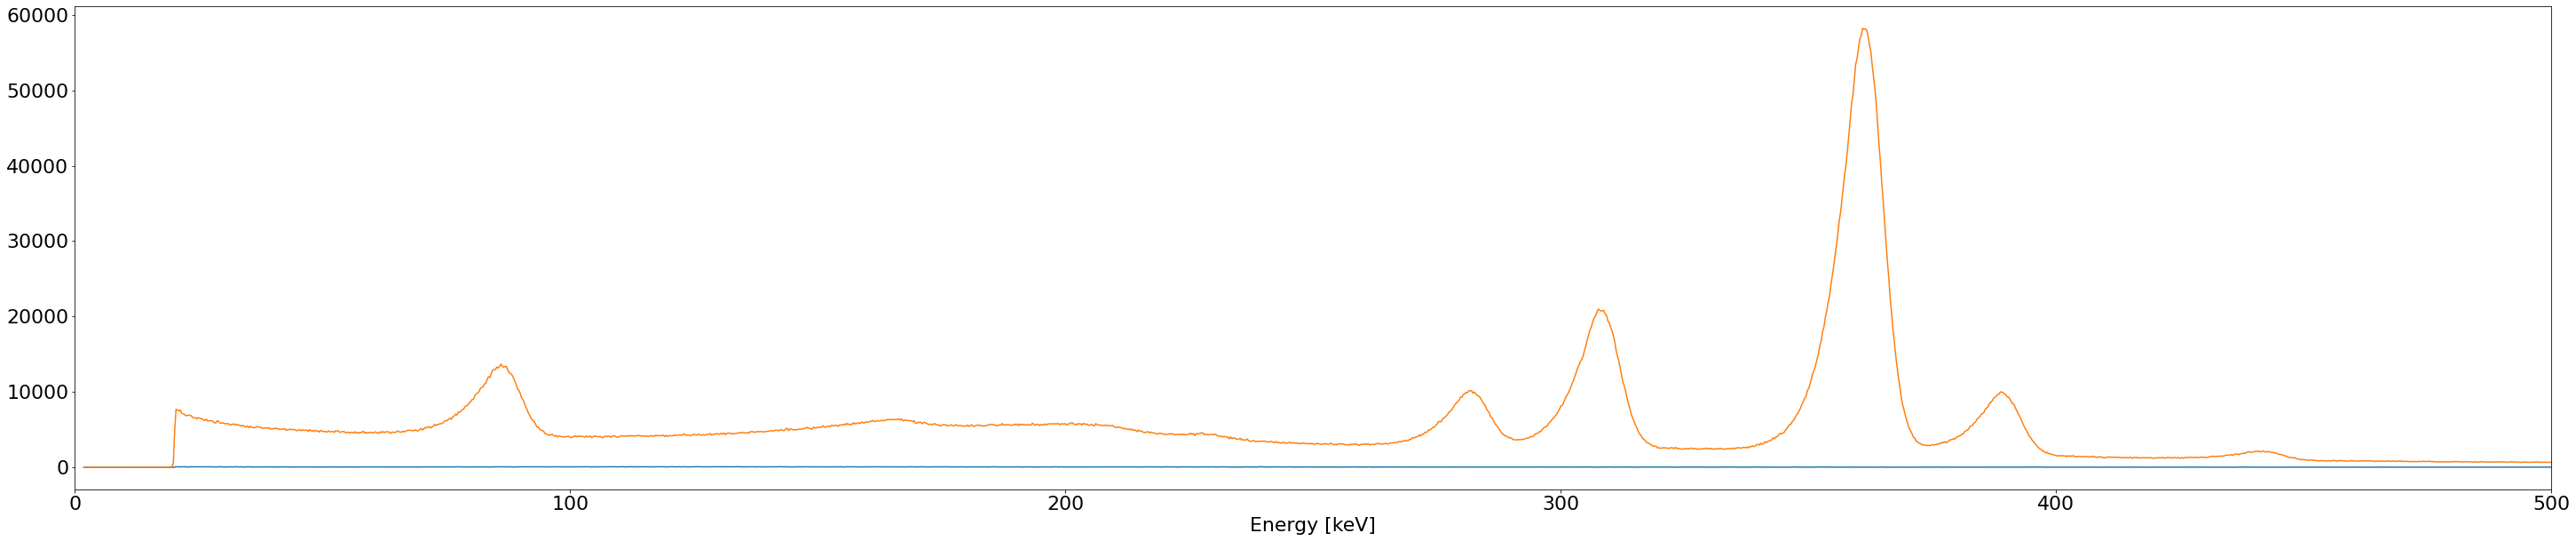

In [181]:
plt.figure(figsize=(50, 10))


# plt.plot(spectrum_bkg, label=r'background')
# plt.plot(spectrum_x, label=r'X')
plt.plot(channelToEnergy, spectrum_co60, label=r'$^{60}Co$')
plt.plot(channelToEnergy, spectrum_ba133, label=r'$^{133}Ba$')
# plt.plot(spectrum_na22, label=r'$^{22}Na$')

plt.xlabel("Energy [keV]")
plt.xlim(0, 500)

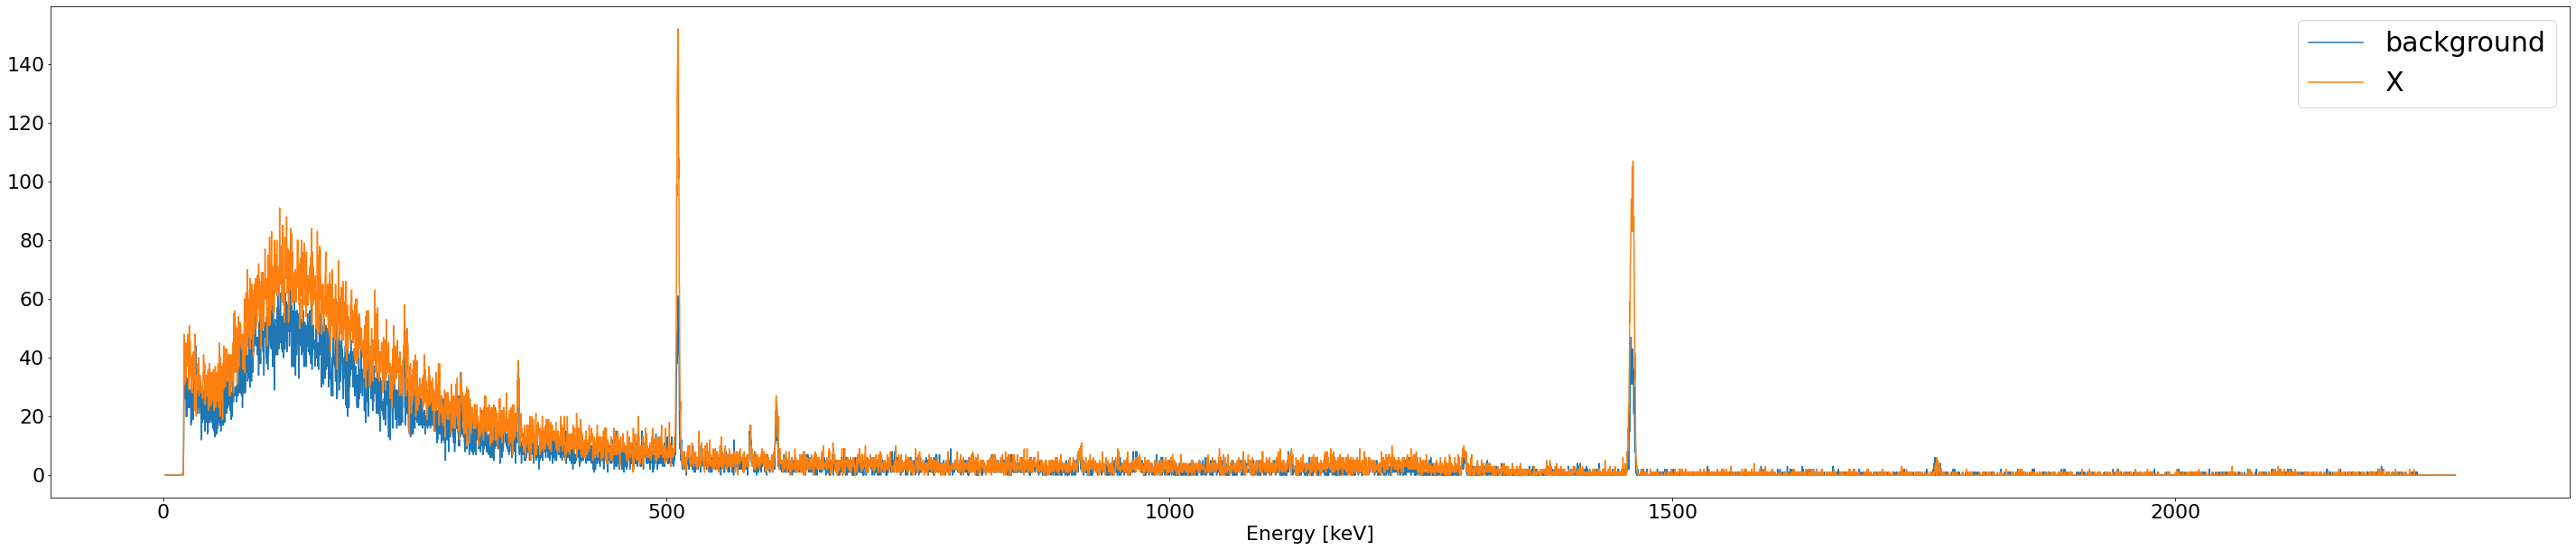

In [182]:
plt.figure(figsize=(50, 10))


plt.plot(channelToEnergy,spectrum_bkg, label=r'background')
plt.plot(channelToEnergy,spectrum_x, label=r'X')
# plt.plot(spectrum_co60/max(spectrum_co60), label=r'$^{60}Co$')
# plt.plot(spectrum_ba133/max(spectrum_ba133), label=r'$^{133}Ba$')
# plt.plot(spectrum_na22/max(spectrum_na22), label=r'$^{22}Na$')
plt.xlabel("Energy [keV]")
plt.legend(fontsize=30)

In [27]:
# ?np.polyfit

In [149]:
### summing up peaks to get total areas of counts

coeff_gauss_E, _ = curve_fit(comb_gauss, channelToEnergy, spectrum_co60-bkgfit, p0=[900, 1173, 10, 800, 1332, 10])
fit_hist_E = comb_gauss(channelToEnergy, *coeff_gauss_E)

#splits our array up, cutting whereever there is a entry, and making sure we cut the 
#energy array the same way
fit_hist_E_split = np.array(np.split(fit_hist_E, np.where(fit_hist_E == 0)[0][1:]), dtype=object)
channelToEnergy_split = np.array(np.split(channelToEnergy, np.where(fit_hist_E == 0)[0][1:]), dtype=object)

#remove all arrays that are length 1 or less
lengths = [len(i)>1 for i in fit_hist_E_split]

#a 2D array holding the values around each peak
fit_hist_E_peaks = fit_hist_E_split[lengths]
channelToEnergyPeaks = channelToEnergy_split[lengths]

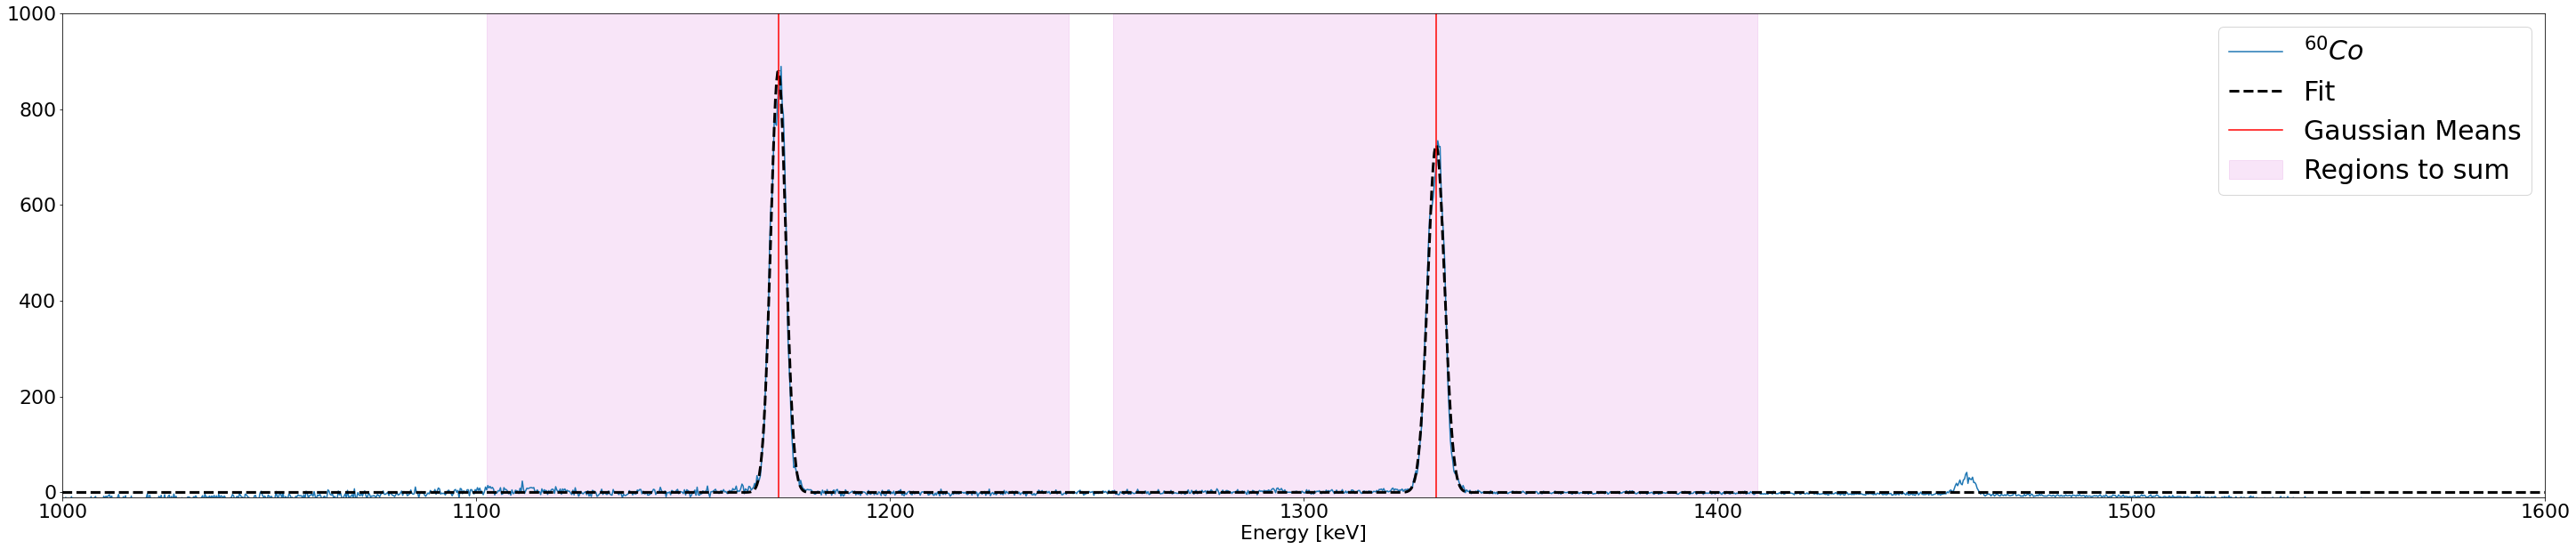

In [183]:
plt.figure(figsize=(50, 10))

plt.plot(channelToEnergy, spectrum_co60-bkgfit, label=r'$^{60}Co$')

#get the min and max energy values that we will sum around for plotting
minMaxEnergyValues = [[np.min(x), np.max(x)] for x in channelToEnergyPeaks]

#empty region just to hold the label
plt.axvspan(0, 0, alpha=0.1, color='m', label="Regions to sum")

for vals in minMaxEnergyValues:
    plt.axvspan(vals[0], vals[1], alpha=0.1, color='m')

plt.plot(channelToEnergy, fit_hist_E, c='k', lw=3, ls='--', label="Fit")

plt.axvline(coeff_gauss_E[1], c='r', label="Gaussian Means")
plt.axvline(coeff_gauss_E[4], c='r')

plt.legend(fontsize=30)
plt.ylim(-10, 1000)
plt.xlim(1000, 1600)

plt.xlabel("Energy [keV]")
plt.show()

In [200]:
#takes in sprectrum that is alreay cut for only one peak
def SumPeaks(x, spectrum):
    
    #the width of one bin
    binwidth = x[2] - x[1]
    
    #sum up all our bins in a region
    totalArea = np.sum(spectrum)*binwidth
    
    return totalArea

#loop through all the peaks and calculate the area under the curve
AreaPeaks = []

for i, peakData in enumerate(fit_hist_E_peaks):
    
    AreaPeaks.append(SumPeaks(channelToEnergyPeaks[i], peakData))
    
print("The total area under each peak is:", AreaPeaks)

The total area under each peak is: [4023.929713419199, 3668.9470382498357]


In [199]:
'''
Returns current activity in Bq
inputs:
    A0 [Bq]
    time [days]
    half_life [days]
'''

def currentActivity(A0, time, half_life):
    return A0*np.exp(-(time*np.log(2))/half_life)

Na22_currentAct = currentActivity(37e3, 762, 2.6018*365)
print(Na22_currentAct)

Co66_currentAct = currentActivity(3.7e5, 16390, 1925.28)
print(Co66_currentAct)

Ba133_currentAct = currentActivity(3.81e5, 6925, 10.551*365)
print(Ba133_currentAct)

21215.67088952769
1012.789257614295
109551.59360259165
